# DATA 550 Lab 4 - Storytelling and visualizing trends and uncertainties

There are two versions of this lab, one in Python and one in R.
The R lab will use `ggplot` and the Python lab will use `Altair`.

This is the R version.

Each partner should choose a version to complete, though keep in mind that **you are required to alternate between completing the R labs and the Python labs** to get experience using both languages.

## Acknowledgemnts

This lab was lightly adapted from the one created by Joel Ostblom for the DSCI 531 version of Data Viz I in the 2020/21 Academic year.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Each partner should complete one file, though collaboration is permitted.</li>
  <li>Push your <code>.ipynb</code> files to GitHub frequently (i.e. not just in one fell swoop at the end).</li>
  <li>Don't forget to submit a clickable link to your GitHub repo on Canvas so we can grade it.</li>
</ul>
</div>

In [57]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
#alt.data_transformers.enable('data_server')
alt.data_transformers.enable("vegafusion")

# Load the R cell magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# 0. The back story

*(If you don't like the back stories, you can jump down to the heading "The data" Also a disclaimer that I am not a linguist, so this lab is my understanding of some articles I have read, it is likely not perfect.)*

First, I just want to thank you for bringing me back to my senses and stopping my world domination attempt and silly startup idea. I don't know what happen, but I clearly wasn't myself there for a while. Now that you have brought me back to normal, I would like design this lab more similar to the first one and go through a topic that I find intriguing and ponder-worthy.

This time, instead of looking around us, we will look inside. Ever since I arrived on this planet, I have been fascinated about your use of airborn oscillations to transmit information generated by electrical impulses. And the fact that you rely on muscular dexterity for the encoding process as well as passive mechnotransduction for the decoding is truly remarkable (in a primitive sense of course, I guess how your kind can appreciate "the remarkable complexity" of a cave painting). Such a system is clearly a bottleneck in terms of information bandwidth and I am surprised a more direct means of intercranial transmission never evolved here, but from the perspective of my research on less evolved galactic lifeforms I find this fascinating!

After hearing that there are over 7,000 languages spoken across this globe, I am curious whether some of these at least allow for more rapid information transmission than others. The implications of this reach beyond just communication as I have recently learned that you also restrict many of your thoughts to those that can be expressed in words (again, fascinating!). This means that you could literally upgrade your thought throughput by learning a new language. And it could mean that there are groups of people who have access to faster thinking others, just because their language can convey information at a higher rate, what an enormous advantage!

## The data

To aid our exploration of whether some languages are more efficient at conveying information than others, I have received assistance from some of your finest scientists. The data in this lab was published as part of a study in Science Advances in 2019 and made publicly available in their online repository. If you want to read part of the article, I recommend that you do it after attempting to answer the questions (or if you get stuck) since it will give away some of the things that we can otherwise "discover" ourselves. There is also a popular science version of this article publish in The Economist, and I link to both in the optional question at the end.

The scientists have compiled two tables, one with general information on the languages we are studying and one with experimental data where they recorded people speaking a certain text in different languages and noted down how fast they spoke, etc. You can find a description of the columns of both datasets below and they are available in your lab repo.

---

<center><h3>Languages dataset</h4></center>

| Column              | Description                                       |
|---------------------|---------------------------------------------------|
| iso_lang            | ISO_639-3 language code                           |
| language            | Language name                                     |
| information density | Bits of information per syllable in the language  |
| distinct_syllables  | The number of different syllables in the language |
| continent           | The continent where the language is spoken        |

---

<center><h3>Spoken texts dataset</h4></center>

| Column    | Description                                     |
|-----------|-------------------------------------------------|
| speaker   | Speaker ID                                      |
| iso_lang  | ISO_639-3 language code                         |
| text      | Text ID                                         |
| sex       | The sex of the speaker                          |
| duration  | The number of seconds it took to speak the text |
| syllables | Number of syllables uttered during the speech   |
| age       | The age of the speaker                          |

---

Overall, you will have a bit less direction in this lab to closer simulate a real-life scenario. The questions are a mix of explicit instructions and describing the problem in text, rather than in exact steps. As part of this, there is also a few data wrangling steps needed. As this is an exercise in you interpreting information, it is up to you to clarify what you don't understand with me and the TAs during labs and office hours, just as you would in a real-life collaboration.

In [58]:
%%R
library(ggplot2)
library(dplyr)
library(tidyverse)

# 1. Language exploration

<p>Let’s first get familiar with potential differences and similarities between the languages in this data set. Clearly a language's information density is going to be important in how quick a speaker can convey information, but I wonder if number of distinct syllabus matter. Let's see if we can see any patterns by organizing the languages by these two variables.</p>

<div class="alert alert-success" style="color:black">

### Question 1
rubric={accuracy:1,visualization:1}

<h4>R</h4>
<ol type="1">
<li>Create a scatterplot of the information density of each language versus its number of distinct syllabus.</li>
<li>You will notice that the data appears to cluster in groups in the scatter plot. Can you find a categorical variable in this dataframe that roughly explains this clustering? Color the points in the plot you just created according that variable and add a suitable trend line for each cluster (optionally including a confidence interval for the fitted line). If there are any points that seem to be outliers, avoid overfitting the trendline to them.</li>
<li>If you think any particular data points deviate from their cluster, label them with their language name in the plot.</li>
</ol>

</div>

`geom_smooth()` using formula = 'y ~ x'


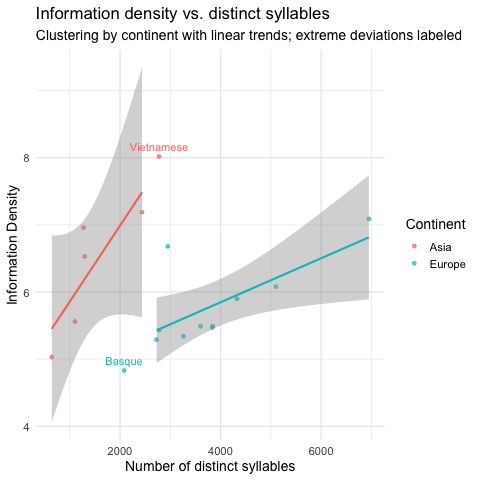

In [148]:
%%R
# YOUR ANSWER GOES HERE
options(repr.plot.width = 7, repr.plot.height = 6)
df<-read.csv("data/languages.csv")
deviating <- df%>%
filter(
      information_density > quantile(information_density, 0.95, na.rm = TRUE) |
      information_density < quantile(information_density, 0.05, na.rm = TRUE)
)

df_fit<-df%>%
filter(!language %in% deviating$language)


pA<-ggplot(df,aes(x=distinct_syllables,y=information_density,color=continent))+geom_point(alpha=0.7)+
geom_smooth(data=df_fit, 
            aes(group=continent),
            method="lm",
            se=TRUE,
            linewidth=1,
            size=3.5,
            show.legend=FALSE
           )+
geom_text(data=deviating,aes(label=language),vjust=-0.8,show.legend=FALSE)+
labs(x="Number of distinct syllables",
     y="Information Density",
     color="Continent",
     title="Information density vs. distinct syllables",
     subtitle="Clustering by continent with linear trends; extreme deviations labeled"
    )+theme_minimal(base_size = 14)
pA

# 2. Speech rate and information density

Hmm... what an intriguing relationship we just revealed... let’s keep these clusters in mind while exploring whether continuing our exploration. The two variables that directly determine the information rate of a language are its information density (bits of information per syllable) and the rate at which it is spoken (syllables per second). A high value in both would indicate a high information rate and efficient communication (a higher number of information bits conveyed per second).

<div class="alert alert-success" style="color:black">

### Question 2
rubric={reasoning:2,accuracy:3}
    
<h4>R</h4>
<ol type="1">
<li>While the information density of each language have already been provided to us, we will have to approximate the speech rate (syllables per second) of each language via the <code>spoken_texts</code> dataset. Using this data, calculate the average speech rate per language (for now, treat all entries as individual observations, even if some are read by the same person).</li>
    <li>Create a new column, <code>speech_rate</code>, in the <code>languages</code> data frame that hold these average values. Since the calculated values are not in the same order as the languages in the <code>languages</code> data frame, you cannot simply append it. Instead, you need to use the <code>inner_join</code> function to merge the dataframe of average speech rate values that you just created with the <code>languages</code> dataframe. The language ISO codes could be used as the column to join on.
<li>Create a scatter plot of the information density versus the speech rate for the <code>languages</code> dataframe. Use the same groupings as in the previous scatter plot you made and add one trend line per group. Label the same points with text labels as in the previous scatterplot.</li>
<li>Write a few sentences under the plot describing the relationship you observe. Based on this plot, do speakers of any particular languages appear to be more efficient at conveying information?</li>
</ol>
    
</div>

`geom_smooth()` using formula = 'y ~ x'


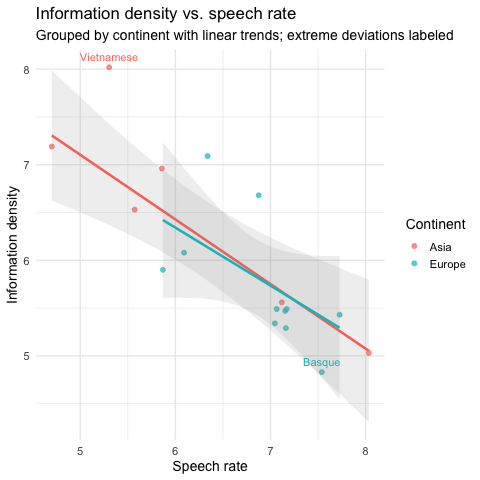

In [146]:
%%R
# YOUR ANSWER GOES HERE
options(repr.plot.width = 7, repr.plot.height = 6)

spoken_texts<-read.csv("data/spoken-texts.csv")
languages<-read.csv("data/languages.csv")

spoken_rates<-spoken_texts%>%
    mutate(speech_rate = syllables/duration)
avg_speech_rate<-spoken_rates%>%
    group_by(iso_lang)%>%
    summarise(speech_rate = mean(speech_rate, na.rm = TRUE))
languages_sr<-languages%>%
  inner_join(avg_speech_rate, by = "iso_lang")

deviating <- languages_sr%>%
filter(
      information_density > quantile(information_density, 0.95, na.rm = TRUE) |
      information_density < quantile(information_density, 0.05, na.rm = TRUE)
)

df_fit<-languages_sr%>%
filter(!language %in% deviating$language)

pB<-ggplot(languages_sr, aes(x = speech_rate, y = information_density, color = continent)) +
geom_point(alpha = 0.7,size=2) +
geom_smooth(
    data = df_fit,
    aes(group = continent),
    method = "lm",
    se = TRUE,
    linewidth = 1.2,
    alpha = 0.15,
    show.legend = FALSE
  )+
geom_text(data=deviating,aes(label=language),vjust=-0.8,show.legend=FALSE)+
labs(
    x = "Speech rate",
    y = "Information density",
    color = "Continent",
    title = "Information density vs. speech rate",
    subtitle = "Grouped by continent with linear trends; extreme deviations labeled"
  ) +
  theme_minimal(base_size = 14)
pB

The plot reveals a clear negative relationship between speech rate and information density, with languages that have a greater information density spoken at slower rates and languages with lower information density spoken at faster rates. This relationship holds true across all continents, with the trends for Asia and Europe being almost identical, indicating a similar relationship between information density and speech rate. While there are a couple of languages that do not fit the trend for their continent, such as Vietnamese and Basque, there is no evidence to suggest that any one group of people, or any one continent, has an inherent advantage in information transmission.

# 3. Language information rate

Oh those results are very interesting… Hmmm I wonder why it looks like that… Ahhh I see what happened, I forgot to include the severe limitations of the feeble human mind in my hypothesis, oh oops you’re still here, ehh well 🪄*obliviate* to you and let’s carry on.

<div class="alert alert-success" style="color:black">

### Question 3
rubric={accuracy:3,viz:2}
    
<h4>R</h4>
    
<ol type="1">
<li>It looks like we do not have a language that is high both in information density and speech rate, which could indicate that human minds are not good at processing auditory information beyond a certain rate limit (read more in the article if you're interested). Let’s directly plot the rate at which information is conveyed for all the languages to see if there are at least small differences between them. Combine the appropriate columns to create a new column, <code>information_rate</code>, which holds the amount of information per second conveyed by each speaker.</li>
<li>Create a plot that has the language ISO codes on one axis and the information rate on the other. Plot a graphical representation of either the distribution of data or every single data point. Color this by the same variable as in the previous two scatter plots. Sort the languages in a suitable order.</li>
<li>Include a marks for the mean and the 95% confidence interval on top of the mark you just created above. Color this in a suitable way so that it stands out from the distribution/individual observations created in the previous point.</li>
</ol>
</div>

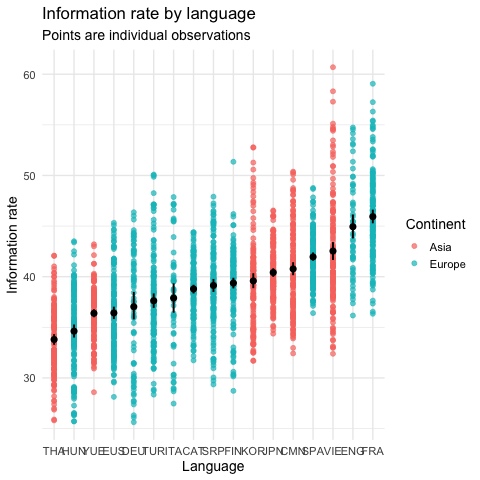

In [145]:
%%R
# YOUR ANSWER GOES HERE
spoken_texts<-read.csv("data/spoken-texts.csv")
languages<-read.csv("data/languages.csv")

obs<-spoken_texts%>%
inner_join(languages, by = "iso_lang")%>%
mutate(
    speech_rate=syllables/duration,
    information_rate=information_density*speech_rate
)

obs<-obs%>%
group_by(iso_lang)%>%
mutate(mean_info_rate=mean(information_rate,na.rm=TRUE))%>%
ungroup()%>%
mutate(iso_lang=fct_reorder(iso_lang,mean_info_rate))

pC<-ggplot(obs, aes(x = iso_lang, y = information_rate, color = continent))+
geom_point(alpha = 0.7, size = 2)+
geom_pointrange(stat="summary",fun.data=mean_cl_boot,color="black",linewidth=0.9)+
labs(
    x="Language",
    y="Information rate",
    color="Continent",
    title="Information rate by language",
    subtitle="Points are individual observations"
)+theme_minimal(base_size = 14)
pC

# 4. Tell a story

<div class="alert alert-info" style="color:black">

### Question 4
rubric={reasoning:3}
    
These results are looking pretty promising, now we just need to add a narrative so that it will be easy for others to follow along with what we have done here. Tell a story using the three plots we have created. Build it up according to the principles and examples from this week's required readings. In your story you can refer to the plots as plot A,B, and C. You story should make it clear what the plot is telling us and how it motivates the next plot we're making so that there is a clear story line for the reader to follow as well as a clear take home message (there might be many messages in these plots, so you can choose which to focus on). No need to write an essay here, a succinct paragraph per plot should do it.

</div>

Plot A:

In Plot A, the information density is shown to vary according to the size of the syllable repertoire of a language, categorized by continent. The data shows a distinct clustering by continent, with European and Asian languages having different linear trends but largely overlapping. Although there is a distinct pattern, there are some languages (like Vietnamese and Basque) that are significantly different from the trend for their continent and are highlighted. This graph raises an important question: if languages have different levels of information density per syllable, could they compensate for this by speaking faster or slower?

Plot B:

Plot B deals with this problem by showing the relationship between information density and speech rate. In this case, it is clear that the relationship is negative because languages with higher information density are spoken slowly, while those spoken quickly have lower information density. There are similar trends in both Asia and Europe; hence, continent-specific efficiency does not apply in this case. These findings pave the way for the final step in the analysis, in which information density and speech rate are considered as a single factor in determining the overall rate of information conveyed.

Plot C:

Plot C directly visualizes the information rate (information per second) for each language, sorted by their mean values. While the individual points represent the variability for each language, the mean, along with the 95% confidence intervals, helps to represent the general information rates for the languages. Although there are differences in the information density and the speech rate, as indicated by the previous plots, the overall information rates for the languages are quite similar, regardless of the continent or the language. The general idea here is that, while the balance between speech rate and information density differs for each language, the overall information rate is quite similar for all the languages, which indicates a common cognitive constraint on the speed at which auditory information can be processed.

# 5. Figure composition

<p>Now that we have the individual figures and the story, the final step for us here is to compile our figures into the same layout for presentation.</p>

<div class="alert alert-success" style="color:black">

### Question 5
rubric={accuracy:1,viz:2}
    
<h4>R</h4>
<ol type="1">
<li>Assign each of your previous three plots to a variable name (you don’t have to repeat the code down here, you can assign it in the original cell, just make sure you are still outputting the variable at the end of those cells so that the plot shows up).</li>
<li>Arrange the three plots into a layout with the two scatter plots to the left and mean + CI plot to the right. The overall layout should look even, so make the scatterplots about half the height and two thirds of the width of the mean + CI plot.</li>
<li>Set proper titles where you think it is needed, and remove and superfluous legends. Show that you know the proper command to save this as a png file on your local computer.</li>
</ol>
    
</div> 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


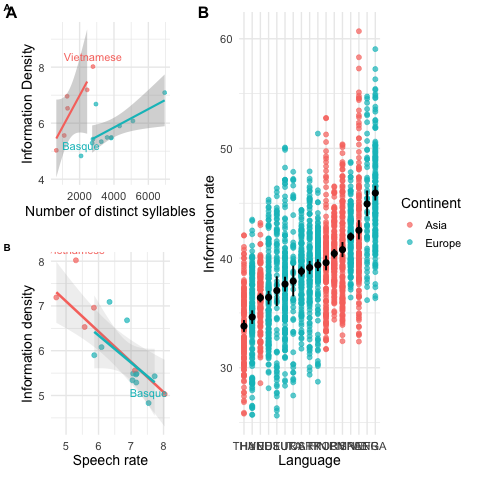

In [155]:
%%R
library(cowplot)

options(repr.plot.width = 24, repr.plot.height = 14)

pA_clean <- pA + labs(title=NULL, subtitle=NULL)+theme(legend.position="none", plot.margin = margin(22,22,22,22))

pB_clean <- pB + labs(title=NULL, subtitle=NULL)+theme(legend.position="none", plot.margin = margin(12,12,12,12))

pC_clean <- pC + labs(title=NULL, subtitle=NULL)+theme(plot.margin = margin(12,12,12,12))

left_labeled <- plot_grid(
  pA_clean, pB_clean,
  ncol = 1,
  labels = c("A", "B"),
  label_size = 10,
  label_fontface = "bold",
  align = "v"
)

combined <- plot_grid(
  left_labeled, pC_clean,
  ncol = 2,
  rel_widths = c(2, 3),
  labels = c("A","B", "C"),
  label_size = 16,
  label_fontface = "bold"
)

ggsave("language_information_tradeoffs.png",
       plot = combined, width = 18, height = 10, dpi = 300)


combined


---

Thank you, this has certainly been educational. I'll present these results to the intergalactic ministry of traffic and hopefully we can spare earth from the hyperspace bypass this time around... ah shoot, me and my big mouth! Basically there is nothing to worry about, you just keep squabbling amongst each other over lines in the sand and hopefully you wont hear from us again. So long and thanks for all the fish! 🛸🐬

---

# 6. Presenting figures to a general or a technical audience 

<p>Below you can see the original figure from <a href="https://www.science.org/doi/10.1126/sciadv.aaw2594">the scientific article in “Science Advances”</a> and the <a href="https://www.economist.com/graphic-detail/2019/09/28/why-are-some-languages-spoken-faster-than-others">simplified version that was published in the Economist</a> (you can create a free account to read the article, no need to pay or use the trial). There is also an R Markdown file for how they did their analysis in the article supplementary materials in case you're interested.</p>

<div class="alert alert-warning" style="color:black">

### Question 6 (Optional)
rubric={reasoning:1.5}

<ol type="1">
<li>Briefly describe how the Economist have simplified the figure from the original scientific publication.</li>
<li>Do you agree with choices made by the Economist? Is there anything you think could have been done differently or additionally, that would have communicated the findings more clearly to a general / popular science audience? This could be based on design choices or your understanding of the data.</li>
</ol>

</div>

## Scientific figure

![image.png](img/article.png)

## Popular science figure

![image.png](img/economist.png)

YOUR ANSWER GOES HERE

# 7. Tell your story

<p>Only do this exercise if you feel like you have time over after completing all labs and want additional feedback on your story telling. It will likely take some time and does not give that many points.</p>

<div class="alert alert-warning" style="color:black">

### Question 7 (Optional)
rubric={reasoning:1}
 
<p>Use the same data to tell another story than the one we told here. Suggestively, you would do some EDA and then use around 2-3 figures with accompanying text to tell a short story about an interesting relationship that you found. I encourage you to try to think of an idea of your own, but if you can't come up with one, I have listed a few ideas below.</p>
    
<details><summary>Suggested ideas to explore</summary>
<ul>
<li>Does the particular text matter for which continent or language was faster? (you could do a paired comparison here)</li>
<li>Group by each speaker’s mean instead of showing all texts (I would personally prefer this to what we did above as I think it shows the variation and sample size more truly, although the means will be similar)</li>
<li>Add language families from the paper and see if there are any patterns among them.</li>
<li>Add additional language features such as tonality and see if there any patterns there.</li>
<li>Plot the different language features on a map.</li>
</ul>
</details>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

YOUR ANSWER GOES HERE

---

A couple of interesting videos on communication and language if you have some spare time this weekend:

- Switching from auditory transfer to electric via implants such as [Kevin Warvick's cyborg-like connection of his nervous system to the internet and his wife's jewelry](https://www.youtube.com/watch?v=Z8HeFNJjuj0&feature=youtu.be&t=822).
- There is evidence that the words we have at our disposal influences how we think. This could mean that certain thought patterns and emotions might be more accessible in languages where they are more easily verbalized, and maybe we would have slightly different thoughts if we knew another language (the reference here is the weak form of the Sapiro-Whorf hypothesis of linguistic relativity, not the strong version). After you are done with the lab, I recommend listening to [this talk by Lera Boroditsky](https://www.youtube.com/watch?v=RKK7wGAYP6k) or watching the movie "Arrival" (although they go a bit far...) if you are interested in learning more about this (it's fun to think about!).

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Commit and push all your work (including the .ipynb file) to GitHub.
3. Submit a link to your repo on Canvas (this has to be done only once per group).

---

# Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Were there any questions that you particularly liked or disliked?

#Ans: [Questions you liked]

#Ans: [Questions you disliked]